# Import packages

In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
#!pip install -U scikit-learn

In [3]:
import scipy.stats as stats

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Module 1: Importing Data Sets


In [6]:
df = pd.read_csv('cleaned_dataset.csv')

In [7]:
df.head()

,Unnamed: 0,SoldPr,Type,Zip,Area,Rooms,FullBaths,HalfBaths,BsmtBth,Beds,BsmtBeds,GarageSpaces,houseEra
0,3500,294718.041797,SFH,60077,1100,7,1,0,No,3.0,0,2.0,19A
1,6859,330946.875000,SFH,60025,1600,6,2,0,No,3.0,0,2.0,19B
2,6623,415125.000000,SFH,60025,1500,7,2,0,Yes,3.0,0,2.0,19A
3,8672,336662.931641,SFH,60076,1422,9,1,1,No,3.0,0,2.5,19A
4,4572,571775.077344,SFH,60062,2668,8,2,1,No,4.0,0,2.0,19A


In [8]:
df.dtypes

Unnamed: 0        int64
SoldPr          float64
Type             object
Zip               int64
Area              int64
Rooms             int64
FullBaths         int64
HalfBaths         int64
BsmtBth          object
Beds            float64
BsmtBeds          int64
GarageSpaces    float64
houseEra         object
dtype: object

In [9]:
df.describe()

,Unnamed: 0,SoldPr,Zip,Area,Rooms,FullBaths,HalfBaths,Beds,BsmtBeds,GarageSpaces
count,9358.000000,9.358000e+03,9358.000000,9358.000000,9358.000000,9358.000000,9358.000000,9358.000000,9358.000000,9358.000000
mean,4678.500000,4.891052e+05,60078.897841,2232.239474,7.997649,2.233918,0.555567,3.233223,0.145651,1.672227
std,2701.566243,3.403204e+05,67.498533,1246.771560,2.499160,0.989145,0.579531,1.030825,0.389901,1.348296
min,0.000000,2.562500e+04,60002.000000,372.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2339.250000,2.731625e+05,60053.000000,1349.000000,6.000000,2.000000,0.000000,3.000000,0.000000,1.000000
50%,4678.500000,3.863345e+05,60062.000000,1873.000000,8.000000,2.000000,1.000000,3.000000,0.000000,2.000000
75%,7017.750000,6.041094e+05,60077.000000,2769.750000,9.000000,3.000000,1.000000,4.000000,0.000000,2.000000
max,9357.000000,4.746395e+06,63104.000000,17365.000000,18.000000,8.000000,5.000000,11.000000,3.000000,79.000000


# Data Wrangling

In [10]:
df.drop("Unnamed: 0" , inplace = True , axis = 1)

In [11]:
df.head(2)

,SoldPr,Type,Zip,Area,Rooms,FullBaths,HalfBaths,BsmtBth,Beds,BsmtBeds,GarageSpaces,houseEra
0,294718.041797,SFH,60077,1100,7,1,0,No,3.0,0,2.0,19A
1,330946.875000,SFH,60025,1600,6,2,0,No,3.0,0,2.0,19B


In [12]:
df.describe()

,SoldPr,Zip,Area,Rooms,FullBaths,HalfBaths,Beds,BsmtBeds,GarageSpaces
count,9.358000e+03,9358.000000,9358.000000,9358.000000,9358.000000,9358.000000,9358.000000,9358.000000,9358.000000
mean,4.891052e+05,60078.897841,2232.239474,7.997649,2.233918,0.555567,3.233223,0.145651,1.672227
std,3.403204e+05,67.498533,1246.771560,2.499160,0.989145,0.579531,1.030825,0.389901,1.348296
min,2.562500e+04,60002.000000,372.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.731625e+05,60053.000000,1349.000000,6.000000,2.000000,0.000000,3.000000,0.000000,1.000000
50%,3.863345e+05,60062.000000,1873.000000,8.000000,2.000000,1.000000,3.000000,0.000000,2.000000
75%,6.041094e+05,60077.000000,2769.750000,9.000000,3.000000,1.000000,4.000000,0.000000,2.000000
max,4.746395e+06,63104.000000,17365.000000,18.000000,8.000000,5.000000,11.000000,3.000000,79.000000


# Get the Heatmap Correlations between all variables in our Dataset

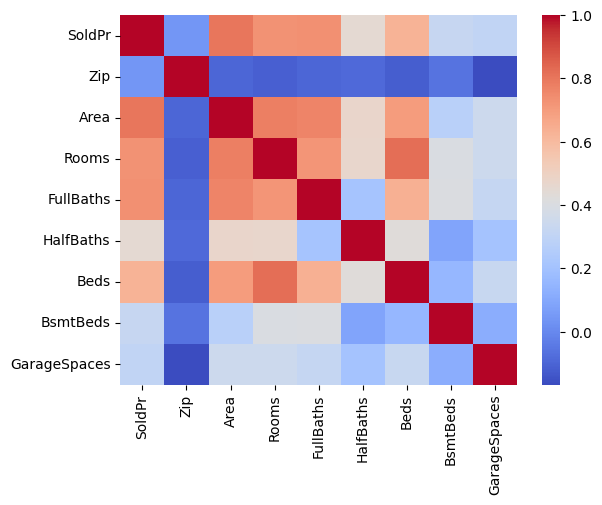

In [13]:
sns.heatmap(df.corr(numeric_only = True) , cmap='coolwarm' , annot = False)
plt.show()

# Visualize the Regression Plot of the correlation between 'GarageSpaces' and 'SoldPr'

Text(0.5, 1.0, "Regression Plot for Correlation between 'Garage Spaces' and 'Sold Prices'")

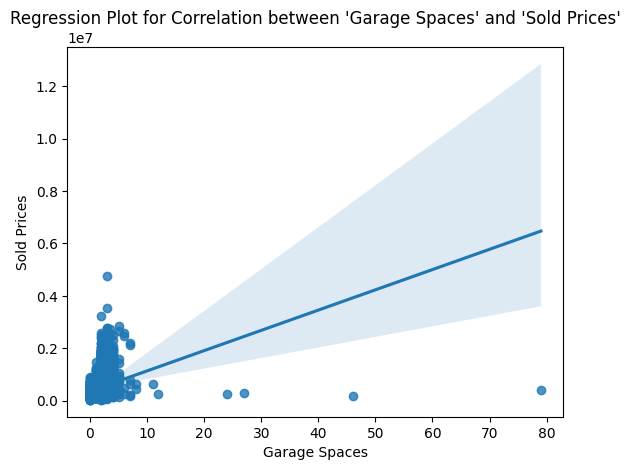

In [14]:
x = df['GarageSpaces']
y = df['SoldPr']
sns.regplot(x = 'GarageSpaces' , y = 'SoldPr' , data = df)
plt.xlabel("Garage Spaces")
plt.ylabel("Sold Prices")
plt.title("Regression Plot for Correlation between 'Garage Spaces' and 'Sold Prices'")

# Get the pearson Correlation between 'Garage Spaces' and 'Sold Prices'

In [15]:
pearson_coef_garage_spaces , p_value_garage_spaces = stats.pearsonr(df['GarageSpaces'] , df['SoldPr'])

In [16]:
print("Pearson Coefficient = " ,pearson_coef_garage_spaces)
print("p-value = " , p_value_garage_spaces)

Pearson Coefficient =  0.3064280238474624
p-value =  1.269786038845299e-202


From the result we see that : 

    1) coefficient is close to 0
    2) p-value not < 0.001 and not between 0.05 < p-value < 0.1
    
So, the correlation between 'GarageSpaces' and 'SoldPr' is "Weak Relationship with no cretainty in result"

# Getting the Statistics of FullBaths related to our Houses Dataset

In [17]:
df['FullBaths'].value_counts().to_frame()

,count
FullBaths,
2,5130
1,1727
3,1542
4,593
5,282
6,67
7,12
8,3
0,2


# Visualizing the Relationship between 'FullBaths' and 'Sold Prices' using the Box Plot 

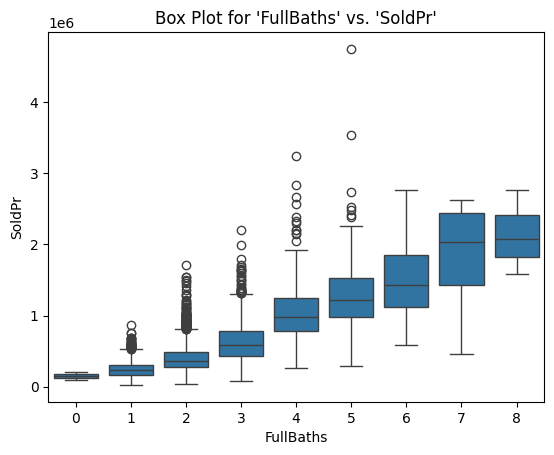

In [18]:
x = df['FullBaths'] 
y = df['SoldPr']
sns.boxplot(x = "FullBaths" , y = "SoldPr" , data = df)
plt.xlabel("FullBaths")
plt.ylabel("SoldPr")
plt.title("Box Plot for 'FullBaths' vs. 'SoldPr'")
plt.show()

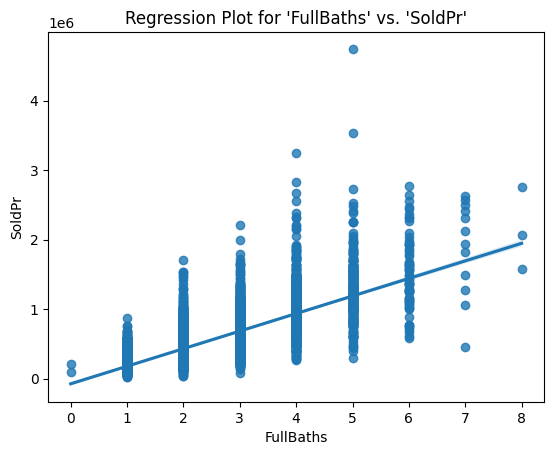

In [19]:
x = df['FullBaths']
y = df['SoldPr']
sns.regplot(x = 'FullBaths' , y = 'SoldPr' , data = df)
plt.xlabel("FullBaths")
plt.ylabel("SoldPr")
plt.title("Regression Plot for 'FullBaths' vs. 'SoldPr'")
plt.show()